CC(=O)Oc1cccc(C(C)C(=O)O)c1


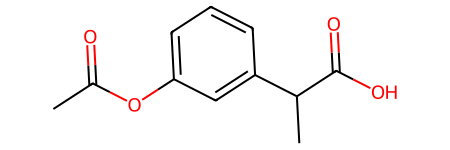

In [4]:
from rdkit import Chem

mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC(=C1)C(C)C(=O)O')
print(Chem.MolToSmiles(mol))
mol

In [5]:
import pybel

def iupac_to_smiles(iupac_name):
    mol = pybel.readstring("name", iupac_name)
    return mol.write("smi").strip()

iupac_name = "4-aminobutyric acid"
smiles_string = iupac_to_smiles(iupac_name)
print(f"The SMILES string for {iupac_name} is {smiles_string}")

from py2opsin import py2opsin

smiles_string = py2opsin(
    chemical_name="4-aminobutyric acid",
    output_format="SMILES"
)
print(f"The SMILES string for 4-aminobutyric acid is {smiles_string}")


AttributeError: module 'pybel' has no attribute 'readstring'

In [6]:
import requests
from functools import cache

from urllib.request import urlopen
from urllib.parse import quote
import timeit 

@cache
def iupac_to_smiles1(iupac_name):
    iupac_name = iupac_name.strip()
    if not iupac_name:
        return None
    try:
        url = f'http://cactus.nci.nih.gov/chemical/structure/{iupac_name}/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return iupac_to_smiles1(iupac_name[1:])

@cache
def iupac_to_smiles2(iupac_name):
    iupac_name = iupac_name.strip()
    url = f"https://opsin.ch.cam.ac.uk/opsin/{iupac_name}.smi"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text.strip()
    elif iupac_name:
        return iupac_to_smiles2(iupac_name[1:])
    return None

iupac_name = "(R/S)-4-amino-3-hydroxy butyric acid"
smiles = iupac_to_smiles1(iupac_name)
# print(timeit.timeit(f'iupac_to_smiles1("{iupac_name}")', globals=globals(), number=10))
# print(timeit.timeit(f'iupac_to_smiles2("{iupac_name}")', globals=globals(), number=10))
smiles


'CCN(CC)C(=O)[C@H]1CN(C)[C@@H]2Cc3c[nH]c4cccc(C2=C1)c34'

In [7]:
import pandas as pd

data = pd.read_csv('SURP-database-reformatted - Flexizymes ready for database.csv', skiprows=1)

SMILES = []
for iupac in data['Monomer Names (required)']:
    method1, method2 = iupac_to_smiles1(iupac), iupac_to_smiles2(iupac)
    SMILES.append({
        'IUPAC': iupac,
        'SMILES1': method1,
        'SMILES2': method2
    })

FileNotFoundError: [Errno 2] No such file or directory: 'SURP-database-reformatted - Flexizymes ready for database.csv'

In [3]:
# put into new csv
SMILES_df = pd.DataFrame(SMILES)
SMILES_df.to_csv('IUPAC_TO_SMILES.csv')

NameError: name 'pd' is not defined